# Tareas principales

## Tomar de referencia la practica 1, tomar solo UNA de las bases de datos y aplicar los metodos de analisis inicial de datos para describir la base de datos (Las columnas, tipos de datos, etc.)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

Llamando la Base de datos de cancer para iniciar despues su manipulacion de los datos

In [2]:
reviews = pd.read_csv("/home/mata/Escritorio/data.csv",index_col=0)

Una vez ya cargados los datos, pasaremos a revisar las columas para ver de lo que se trata

In [3]:
reviews.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Pasaremos a visualizar el tipo de dato que hay en cada columna para posteriormente empezar con la limpieza ded atos mas conveniente

In [4]:
reviews.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Para tener una idea visual de los datos que contiene la tabla visualizaremos las primeras 5 filas

In [5]:
reviews.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Dar una descripcion estadistica basica (la primer parte de la practica, medias, covarianza, desviacion estandar, etc) de los datos de las columnas que a tu criterio ayudaran a entender mejor tus datos.

Bien, ahora tenemos las caracteristicas, la verdad no es necesario saber terminos medicos de cada columna como ¿que es el cancer? etc.
Las respuestas que necesitamos saber son cosas como varianza, desviacion estandar, numero de muestra, valores maximos etc. Por ejemplo el valor maximo de perimeter_mean es 188.500000. ¿Se necesitara estandarizar o normalizar antes de la visualizacion , para decidir si se hara una clasificacion o descripcion? Quien sabe, la repuesta es que no se nada jaja, aver que sale :)

In [6]:
reviews.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Utilizar al menos dos formas de graficar con matplotlib y dos de seaborn para iniciar un analisis estadistico. (En total son 4 graficas las que tienen que hacer).

En una grafica de barras se puede apreciar mucho mejor los casos que son benignosy malignos, de aqui para sacar la relevancia en cada uno de los dos casos en cantidad de las columas que me interezaran. Pienso que es buena una grafica de barras ya que no son valores continuos.

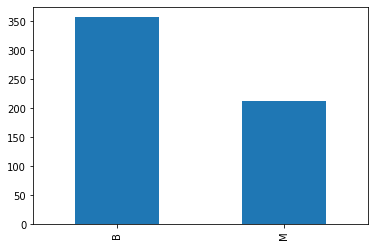

In [7]:
reviews['diagnosis'].value_counts().sort_index().plot.bar()

Se Puede apreciar como se ve el concavity_worst del cancer tanto maligno como benigno ya que los valores son continuos se puede sacar provecho a este histograma para despuestrabajarlos y ver como se difrencian o se relacionan con algun otra columna con sus datos estaristicos parecidos y asi trabajar con points_worst ya que ambos tienen una minima de 0000

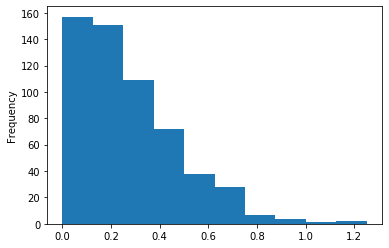

In [17]:
reviews['concavity_worst'].plot.hist()

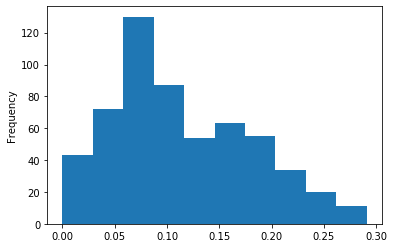

In [18]:
reviews['concave points_worst'].plot.hist()

Vamos a interpretar convocavity_worst y convocavo_points_worst porque parecen similar dada  min de ambos es 000 pero como podemos decidir si estarn correlacionaadas entre si o no, para comprobar se usara un diagrama de conjunto.

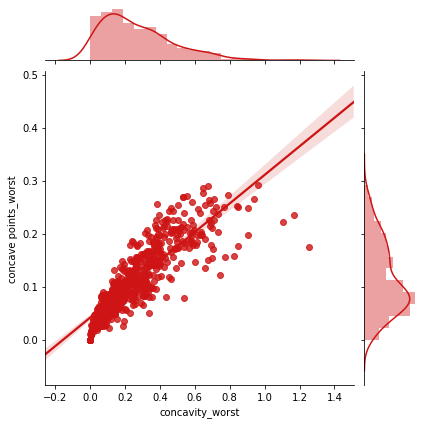

In [9]:
sns.jointplot(reviews.loc[:,'concavity_worst'], reviews.loc[:,'concave points_worst'], kind="regg", color="#ce1414")

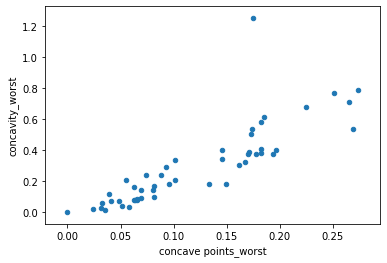

In [10]:
reviews[reviews['concave points_worst'] < 100].sample(50).plot.scatter(x='concave points_worst', y='concavity_worst')


Esta grafica nos muestra que estan pobremente relacionados el concave points_worst y convovavity_worst. Se hizo de 50 datos para que la muestar se apreciara mejor. 

Podemos concluir que aunque estadisticamente tengan la misma ninima , ambas columnas no se relacionan.